# Análisis de la siniestralidad en accidentes de automóviles

<ul>
<li> Autores: Pablo Carretero Collado y Ramón Guerrero Morales</li>
<li> Fecha: 16/12/2021</li>
<li> Email: pablo.carretero@cunef.edu y ramon.guerrero@cunef.edu</li>
<li> Centro: CUNEF Universidad</li>    
</ul>

## Conclusiones finales

El siguiente notebook tiene el objetivo de reflejar las conclusiones del proyecto. Para ello, se va a dar solución a una serie de preguntas.

Para ello, volveremos a cargar los datos y resolveremos las preguntas con los gráficos y sus respectivas explicaciones.

In [7]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Lectura de los datos
collision_df = pd.read_csv('NCDB_1999_to_2014.csv')
collision_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
dtypes: int64(2), object(20)
memory usage: 983.6+ MB


<ul>
<li>¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?</li>
</ul>

**Modelos de vehículo más propensos a tener accidentes.**

<AxesSubplot:>

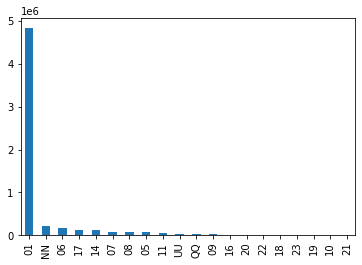

In [9]:
vehicles = collision_df['V_TYPE'].value_counts()
vehicles.plot(kind='bar')

In [10]:
vehicles.head()

01    4827390
NN     227913
06     175491
17     122907
14     122734
Name: V_TYPE, dtype: int64

El gráfico anterior muestra el conteo de tipos de vehículos (V_TYPE) por accidentes.
Observando el gráfico, se ve claramente como los vehículos ligeros (1) son los más propensos a tener un accidente. También es importante destacar que el número de vehículos ligeros presentes en las carreteras es mucho mayor. En segundo lugar, aparece la categorías NN, que designa a los peatones. Seguidamente, los vehículos más propensos a tener accidentes son: furgonetas de reparto (6), bicicletas (17), motocicletas (14), camiones tráiler (7) y los tractores (8).

**Modelos de vehículo menos propensos a tener accidentes.**

In [11]:
vehicles.tail()

18    3132
23    3075
19    2001
10     906
21     825
Name: V_TYPE, dtype: int64

Utilizando el gráfico anterior, los vehículos menos propensos a sufrir accidentes, son los camiones de bomberos (21), los buses de colegios (10), vehículos de granja (19), tranvías (23) y caravanas (18).

**¿ Existe relación entre la antigüedad del vehículo y el número de accidentes?**

In [12]:
collision_df_plot = collision_df

In [13]:
#Prescindimos de valores no numéricos
null_values = ["U","UU","UUUU","X","XX", "QQ", "Q", "N", "NN", "NNNN"]
for columna in collision_df_plot:
         collision_df_plot[columna]=collision_df_plot[columna].replace(null_values, np.nan)

In [14]:
collision_df_plot = collision_df.dropna(axis=0)

In [15]:
collision_df_plot['C_V_YEAR']= collision_df_plot['C_YEAR'].astype('int64') - collision_df_plot['V_YEAR'].astype('int64')

<AxesSubplot:xlabel='C_V_YEAR'>

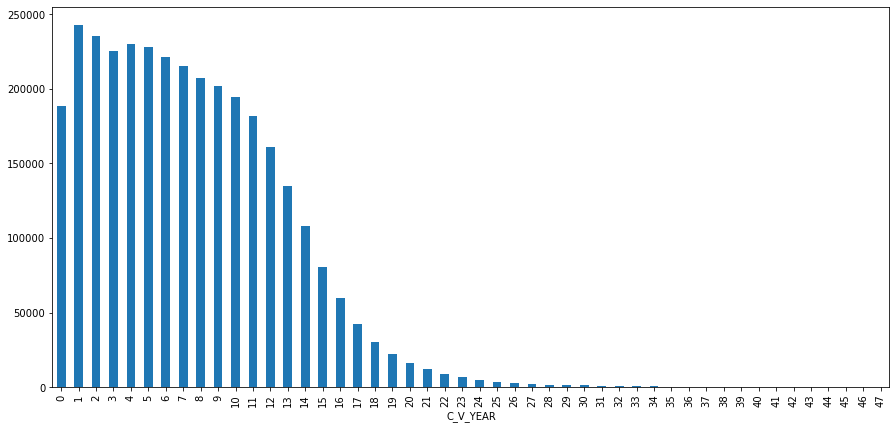

In [16]:
years = collision_df_plot.groupby('C_V_YEAR')['C_SEV'].count()
years[2:50].plot(kind='bar', figsize = (15,7))

Se ha calculado una columna con la antiguedad del coche en el momento del accidente, haciendo una diferencia entre el año de matriculación del coche y el del accidente. Viendo la gráfica vemos como el número de accidentes disminuye con los años de antiguedad. Sin embargo, esto no quiere decir que los coches con mayor antiguedad sean más seguros. Por ello, vamos a analizar aquellos coches, que de tener un accidente, han tenido más fallecimientos.

<AxesSubplot:xlabel='C_V_YEAR', ylabel='Fatal Percentage (%)'>

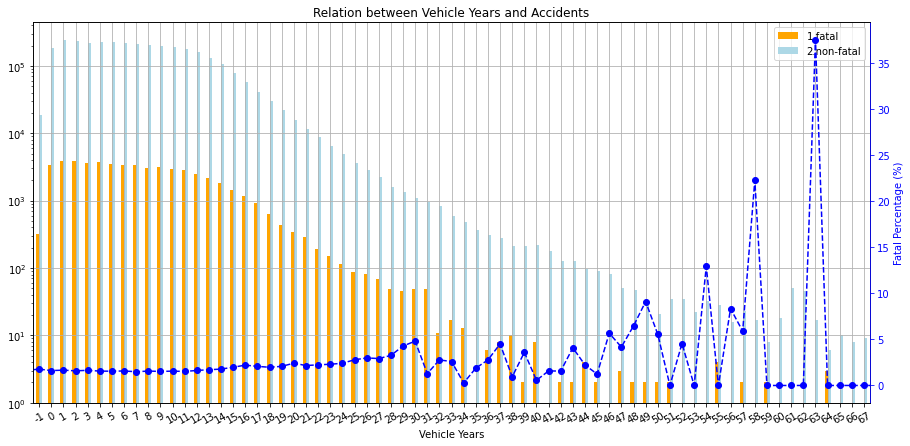

In [17]:
antiguedad_veh = collision_df_plot.groupby(['C_V_YEAR','C_SEV']).size().unstack().fillna(0)
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Fatal Percentage (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

antiguedad_veh[1:70].plot(kind='bar',rot=30,log=True,color=['orange','lightblue'],figsize=(15,7),
         title='Relation between Vehicle Years and Accidents', ax=ax1)
ax1.grid(axis='both')
ax1.legend(['1.fatal','2.non-fatal'])
ax1.set_xlabel('Vehicle Years')

se1 = antiguedad_veh[1]/(antiguedad_veh[1]+antiguedad_veh[2])*100
se1.plot(c='b', style='o--', ax=ax2)

El gráfico anterior nos muestra claramente como el mayor número de accidentes se produce en los coches más modernos, pero esto ocurre porque el número de coches antiguos es mucho menor. La línea azul nos va a mostrar el porcentaje de fallecimientos respecto al total de los accidentes. Como se puede observar, este porcentaje va aumentando en función de la antiguedad del coche. Con ello podemos decir que la antiguedad del coche juega un papel muy importante en la seguridad de sus ocupantes.

**Características personales de los conductores en los accidentes**

Para analizar las variables personales, nos agruparemos de manera relativa por accidente.

<AxesSubplot:xlabel='P_SEX', ylabel='Fatal per Sex (%)'>

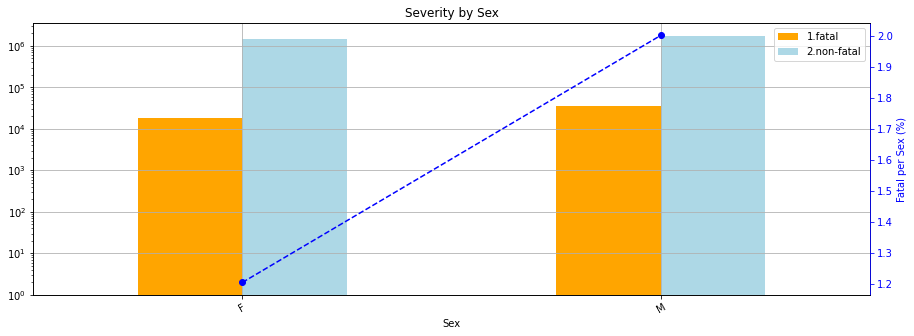

In [18]:
# Sexo
sex = collision_df_plot.groupby(['P_SEX','C_SEV']).size().unstack().fillna(0)
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Fatal per Sex (%)')
ax2.spines['right'].set_color('b')
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y',colors='b')

sex.plot(kind='bar',rot=30,log=True,color=['orange','lightblue'],figsize=(15,5),
         title='Severity by Sex', ax=ax1)
ax1.grid(axis='both')
ax1.legend(['1.fatal','2.non-fatal'])
ax1.set_xlabel('Sex')

se1 = sex[1]/(sex[1]+sex[2])*100
se1.plot(c='b', style='o--', ax=ax2)

Respecto a las características personales, hemos agrupado por sexo. El número de accidentes está compensado, aunque la fatalidad es mayor en los hombres.

Para el estudio de las colisiones por edades, hemos dividido y estudiado por separado a los adultos y a los jóvenes. Se observa como los accidentes se reducen a mayor edad. Esto se explica por la experiencia de conducción. Como conslusión a esta variable, podemos decir que la edad es muy importante, pues los jóvenes son los que más accidentes causan.

<AxesSubplot:xlabel='P_AGE'>

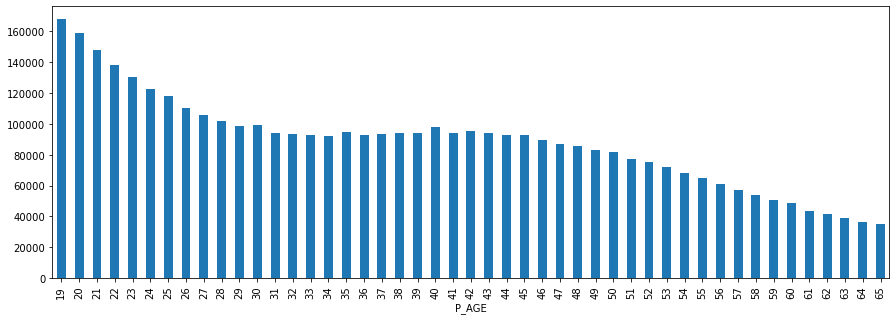

In [19]:
# Age para adultos
AGE_SEV = collision_df.groupby('P_AGE')['C_SEV'].count()
AGE_SEV[18:65].plot(kind='bar',figsize=(15,5))


<AxesSubplot:xlabel='P_AGE'>

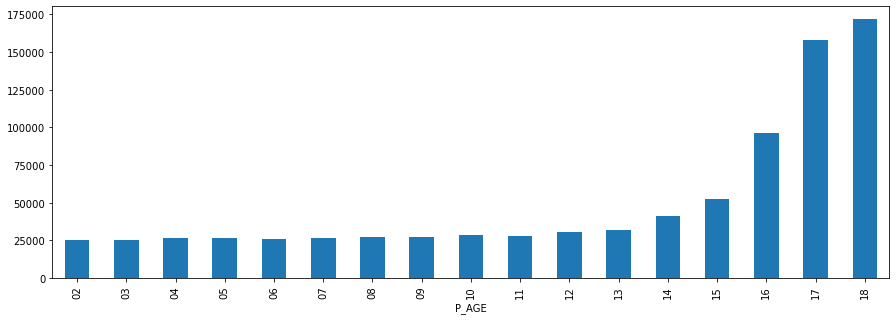

In [20]:
# Age para jóvenes
AGE_SEV = collision_df.groupby('P_AGE')['C_SEV'].count()
AGE_SEV[1:18].plot(kind='bar',figsize=(15,5))


Observando los accidentes de los más jóvenes, se observa un importante aumento en la franja de edad de los 16 hasta los 18 años. Esto se explica porque en Canadá se puede obtener la licencia de conducción a partir de los 16 años.

**¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?**

Para el estudio de lo que más contribuye a que haya más fallecimientos, hemos recurrido a la matriz de correlaciones que obtuvimos en el EDA. 

Observamos como las variables con las que más se correlaciona positivamente, es C_CONF, es decir cómo ocurrió el accidente, y P_ISEV, que indica el grado de severidad. No obstante, estas variables no van a determinar qué factor influye en que haya más fallecimientos.

Seguidamente, con menos correlación destacan las variables C_SAFE,C_RCFG, C_TRAF. Con ello se puede observar como el elemento de seguridad juega un papel muy determinante a la hora de producirse fallecimientos o no. Adicionalmente, donde se produjo el accidente y la señal de tráfico también determinan el número de fallecimientos.

Por último también destacamos C_RALN y V_TYPE, que indican el tipo de carretera (curva ascendente, curva cerrada...) y el tipo de vehículo también juegan un papel determinante para que se produzcan fallecimientos o no. Todo ello, se explica porque no todos los vehículos están hechos para todos los tipos de carreteras.

**Dado un accidente, ¿se puede generar un modelo que prediga si habrá fallecimientos o no?** 

El objetivo principal de este trabajo ha sido observar se puede llevar a cabo un modelo que pueda predecir si en un accidente se van a producir fallecimientos o no. Para ello, hemos realizado un profundo estudio de las variables que tenemos incluidas en el dataset.

Seguidamente, hemos transformado los datos para que se puedan llevar a cabo los modelos de predicción. Una vez tuvimos todos los modelos, hemos visto qué modelo nos aportaba los mejores resultados, fijándonos siempre en el fallo de: "El modelo dice que no hay fallecido (0) , pero en la realidad si se produce (1)".

Como mejor modelo elegimos el Random Forest dado que sus métricas nos parecen mejores que las de los demás modelos. 

Hemos observado que tiene unas mejores métricas recall, precisión y f-score además de tener una buena curva roc.  
Solo encontramos una mala matriz de confusión que intentaremos mejorar mediante la manipulación de los pesos dentro de los hiperparámetros. 

Por tanto, como es el mejor modelo que se adapta a nuestras exigencias pasaremos a su optimización. Una vez realizada la optimización de hiperparámetros obtenemos incluso mejor curva roc y matriz de confusión. 

Nuestro modelo acierta los 0 en un 75% y los 1 en un 69% además de tener un score de 0.721 en la curva roc. 

Finalmente, cabe mencionar que se llevará el modelo desarrollado a producción.